***1 - Problema***

Debo predecir el Marathon time de posibles maratonistas. ¿Qué variables crees que son relevantes para poder predecir este suceso? Existen valores null y tipos de datos incorrectos.

*PASOS A SEGUIR*:

1- Preparacion de Datos

2- Entrenamiento del Modelo

3- Predicciones

***2 - Set de datos***

id:contador simple

Maratón:el nombre del maratón donde se extrajeron los datos. Utilizo los datos que salen de la "Comparación lado a lado" de Strava y los datos que salen del resultado final del maratón.

Nombre:el nombre del atleta, todavía hay algunos problemas con UTF-8, lo solucionaré pronto

Categoría:
el sexo y grupo de edad de un corredor.

Atletas masculinos:

- MAM menores de 40 años

- WAM Mujeres menores de 40 años

- M40 Atletas Masculinos entre 40 y 45 años

km4week:Este es el número total de kilómetros recorridos en las últimas 4 semanas antes del maratón, maratón incluido. Si por ejemplo el km4semana es 100, el deportista ha corrido 400 km en las cuatro semanas previas al maratón

sp4week: Esta es la velocidad promedio del atleta en las últimas 4 semanas de entrenamiento.

Entrenamiento cruzado: Si el corredor también es ciclista, o triatleta, o hace otro deporte

Muro21:En decimal. El campo complicado. Para reconocer una buena actuación, como maratonista, tengo que correr la primera media maratón con el mismo intervalo de la segunda mitad. Si, por ejemplo, corro la primera media maratón en 1h30m, debo terminar la maratón en 3h (por hacer un buen trabajo). Si termino en 3h20m, empecé demasiado rápido y me golpeé "contra la pared". Mi historial de entrenamiento es, por tanto, menos válido, ya que no estaba estimando mi resultado.

Tiempo de maratón: En decimal. Este es el resultado final. Según mi historial de entrenamiento, debo predecir mi tiempo esperado en el maratón.

Categoría: Este es un campo auxiliar. Da alguna dirección, así que siéntete libre de usarlo o desecharlo. Se agrupa en:

- Resultados en menos de 3h
- Resultados B entre 3h y 3h20m
- Resultados C entre 3h20m y 3h40m
- Resultados D entre las 3h40 y las 4h

In [1]:
# IMPORTACION DE LIBREARIAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LECTURA
maraton = pd.read_csv ('MarathonData.csv')

In [3]:
# VISUALIZACION DEL DATASET
maraton
# Para ver las primeras (n) --> banco.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D


In [4]:
# VEO LAS VARIABLES CATEGORTIAS Y NUMERICAS
maraton.info()
# Es un dataset dentro de todo limpio, habria que cambiar algun valor. Como por ejemplo el tipo de datos de la columna 'Wall21' deberia ser numerico y es object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [5]:
# PRE PROCESAMIENTO DE DATOS
# Cambio a valor numerico la columna Wall21
maraton['Wall21'] = pd.to_numeric(maraton['Wall21'],errors='coerce')

maraton.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         81 non-null     float64
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(4), int64(1), object(5)
memory usage: 6.9+ KB


In [6]:
# COMO SE DISTRIBUYEN LAS VARIABLES NUMERICAS?
maraton.describe()


,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,81.000000,87.000000
mean,44.000000,62.347126,139.840706,1.630617,3.319080
std,25.258662,26.956019,1191.427864,0.210490,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.498168,1.450000,3.045000
50%,44.000000,58.800000,12.163424,1.620000,3.320000
75%,65.500000,77.500000,12.854036,1.760000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'km4week'}>],
       [<Axes: title={'center': 'sp4week'}>,
        <Axes: title={'center': 'Wall21'}>],
       [<Axes: title={'center': 'MarathonTime'}>, <Axes: >]], dtype=object)

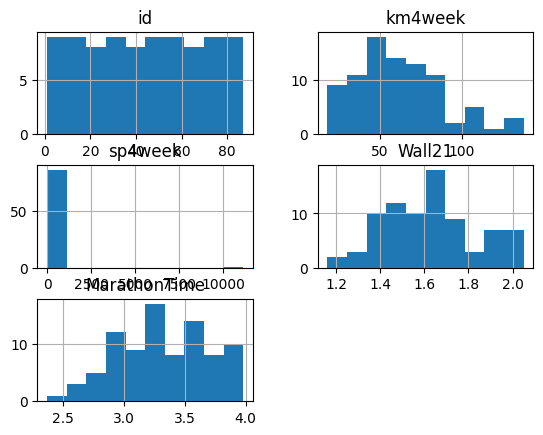

In [7]:
# VISION GRAFICA
maraton.hist()

OBSERVO QUE COLUMNAS ME CONVIENE METER EN EL MODELO DE REGRESION LINEAL

Por ejemplo en MarathonTime, mi variable a predecir, hay muy pocos corredores que pueden cumplir la meta en 2 horas y media. La mayoria se ve que lo hace entre 3 y 3 horas y media.

In [8]:
# PROCESAMIENTO DE DATOS
# Selecciono las columnas que creo que no van a tener sentido en mi modelo

# A MI PARECER, ESTAS COLUMNAS NO LAS VOY A NECESITAR PARA MI MODELO, ENTONCES LAS ELIMINO
maraton = maraton.drop(columns=['Name']) # El nombre particular tampoco.
maraton = maraton.drop(columns=['id']) # El ID no tiene ninguna relacion con el tiempo de maraton
maraton = maraton.drop(columns=['Marathon'])
maraton = maraton.drop(columns=['CATEGORY'])

maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,NaN,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,NaN,1.94,3.94
85,M45,33.2,11.066667,NaN,2.05,3.95


In [9]:
# Observo si hay columnas con valores nulos. Para luego tomar una decision;
maraton.isna().sum() # Sirve para ver los valores nulos de todas las columnas

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
dtype: int64

In [10]:
# Relleno los valores nulos de CrossTraining con 0
maraton['CrossTraining'] = maraton  ['CrossTraining'].fillna(0)
maraton


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [11]:
# Elimino filas con valores nulos
maraton = maraton.dropna(how='any')
maraton
# Ahora tengo 81 filas en vez de 87.

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [12]:
# Ahora voy a modificar en la columna CrossTraining el valor 'ciclista xh' por un valor numerico para el modelo de machine learning
# Primero veo cuantos valores unicos hay en CrossTraining
maraton['CrossTraining'].unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 3h',
       'ciclista 5h'], dtype=object)

In [13]:
# Cambio los valores CrossTraining, mantiniendo su valor, pero dejandolo como tipo de datos int.
valores_cross = {'CrossTraining': {'ciclista 1h': 1,'ciclista 3h': 3,'ciclista 4h': 4,'ciclista 5h':5, 'ciclista 13h': 13}}
maraton.replace(valores_cross, inplace=True)
maraton

C:\Users\user\AppData\Local\Temp\ipykernel_10908\1789519465.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  maraton.replace(valores_cross, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_10908\1789519465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maraton.replace(valores_cross, inplace=True)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,3,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [14]:
# Hago exactamente lo mismo para la Category
# Primero veo cuantos valores unicos hay en Category
maraton['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 'WAM'], dtype=object)

In [15]:
# Ahora cambio los valores tambien a tipo int.
valores_cross = {'Category': {'MAM': 1,'WAM': 2,'M40': 3,'M45':4, 'M50': 5,'M55': 6}}
maraton.replace(valores_cross, inplace=True)
maraton

C:\Users\user\AppData\Local\Temp\ipykernel_10908\1054078823.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  maraton.replace(valores_cross, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_10908\1054078823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maraton.replace(valores_cross, inplace=True)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,4,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,6,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,3,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,4,33.2,11.066667,0,2.05,3.95


PARA ARMAR EL MODELO DE PREDICCION, NECESITO VER QUE VARIABLES SE RELACIONAN MEJOR CON MARATHONTIME, ENTONCES PROCEDO A HACER GRAFICOS DE DISPERSION PARA PODER VER CON MEJOR CLARIDAD;

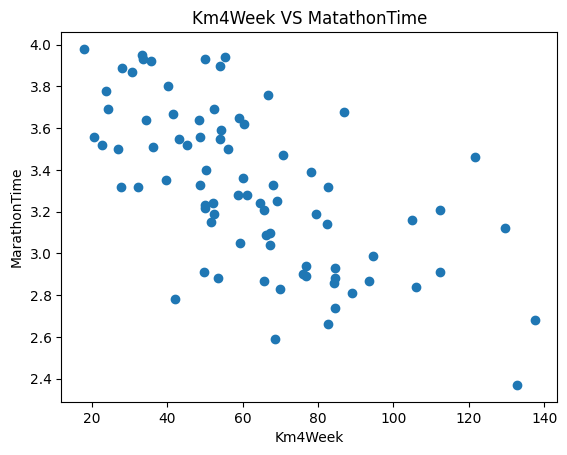

In [16]:
# GRAFICO DE DISPERSION CON KM4WEEK Y MARATONTIME
plt.scatter(x=maraton['km4week'], y=maraton['MarathonTime'])
plt.title ('Km4Week VS MatathonTime')
plt.xlabel('Km4Week')
plt.ylabel('MarathonTime')
plt.show()

Se puede ver gracias al grafico que existe cierta tendencia. Aquellos corredores que recorriendo mas KM las ultimas 4 semanas (basicamente practicaron) tienden a completar el marathon en menor tiempo.


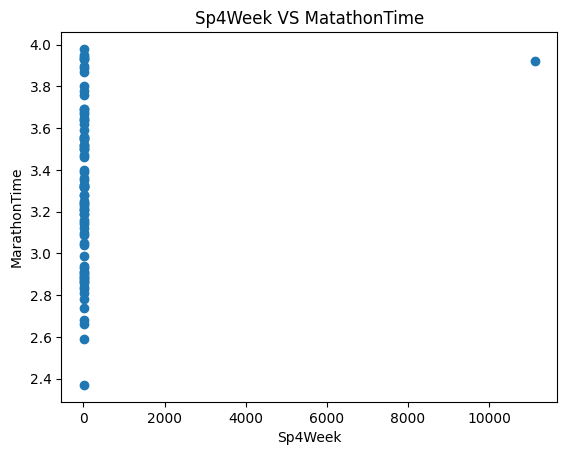

In [17]:
# GRAFICO DE DISPERSION CON SP4WEEK Y MARATONTIME
plt.scatter(x=maraton['sp4week'], y=maraton['MarathonTime'])
plt.title ('Sp4Week VS MatathonTime')
plt.xlabel('Sp4Week')
plt.ylabel('MarathonTime')
plt.show()

Existe un valor atipico, el cual distorsiona mucho la grafica. Por lo que lo eliminare.

In [18]:
maraton= maraton.query('sp4week<1000')

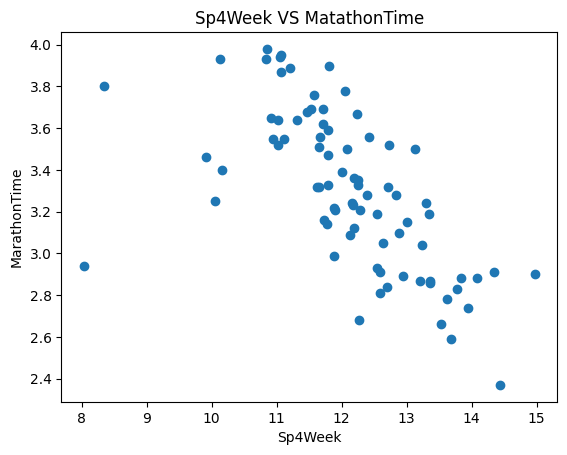

In [19]:
# GRAFICO DE DISPERSION CON SP4WEEK Y MARATONTIME
plt.scatter(x=maraton['sp4week'], y=maraton['MarathonTime'])
plt.title ('Sp4Week VS MatathonTime')
plt.xlabel('Sp4Week')
plt.ylabel('MarathonTime')
plt.show()

Se puede observar que a mayor velocidad promedio, los corredores completan la maraton mas rapido. Lo cual tiene sentido.

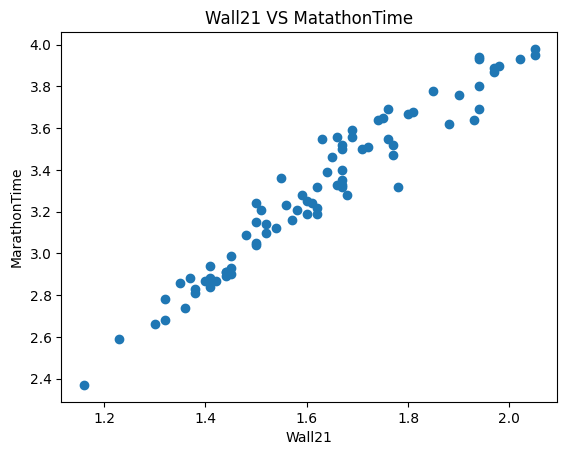

In [20]:
# GRAFICO DE DISPERSION CON WALL21 Y MARATONTIME
plt.scatter(x=maraton['Wall21'], y=maraton['MarathonTime'])
plt.title ('Wall21 VS MatathonTime')
plt.xlabel('Wall21')
plt.ylabel('MarathonTime')
plt.show()

Con las premisa de que; para reconocer una buena actuación, como maratonista, tengo que correr la primera media maratón con el mismo intervalo de la segunda mitad.

Se puede ver que aquellos que realizan la primera mitad en menor tiempo, y la segunda mitad en el mismo tiempo que la primera, completan el maraton en menor tiempo

HASTA ALLI FUE EL PROCESAMIENTO DE DATOS Y LA INTERPRETACION DE ELLOS; AHORA TOCA ENTRENAR AL MODELO.

Por un lado vamos a tener las variables predictorias (Km4week, Sp4wekk, Wall21) y por otra la variable a predecir (MarathonTime)

80% del dataset, lo voy a usar para entrenar al modelo, lo que seria datos de entrenamiento. El cual va a tener sus variables predictorias y su variable a predecir

20% del datast, lo voy a usar como datos test o de validacion. El cual va a tener sus variables predictorias y su variable a predecir. 

PORQUE PARTE EN DOS EL DATASET; 
Este 20% me va a servir para saber cuando tengo el modelo hecho, si el modelo se ha entrenado bien o no.
Lo que hago es tomar las variables predictorias de mi conjunto de datos de test (20%) y se las paso al modelo entrenado, este me dara unas predicciones, y me dira que para X corredor le tomara X tiempo. Pero yo ya se el tiempo que a ese X corredor, porque era uno de los datos de mi entrada.

Entonces comparo la variable a predecir, que me guarde, pero el modelo no la conoce de antes. Y puedo ver como de lejos esta de la prediccion que me hizo el modelo.


2 - FASE DE ENTRENAMIENTOS

Procedo a utilizar los datos de entrenamiento y hare el proceso de entrenamiento de machine learning.

In [21]:
# Procedo a partir el dataset en 2
datos_entrenamiento = maraton.sample(frac=0.8, random_state=0) # Sample --> Devuelve una muestra aleatoria de elementos del dataset 
datos_test = maraton.drop(datos_entrenamiento.index) 

En la primera linea lo que hago es; que creo una variable llamada datos_entrenamiento, que es una parte (80%) del dataset original llamado maraton

En la segunda linea lo que hago es; que creo una variable llamada datos_test, es todo el dataset, es decir todo 'maraton', menos datos_entrenamiento, es decir, menos el 80%.

Por lo tanto;

datos_entrenamiento es el 80% de maraton

datos_test es el 20% de maraton

In [22]:
# Compruebo haberme quedado con el 80% del dataset en la variable datos_entrenamiento
datos_entrenamiento

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
54,3,70.7,11.783333,0,1.77,3.47
28,4,51.6,13.008403,0,1.50,3.15
31,1,79.4,13.344538,0,1.60,3.19
84,3,55.4,11.043189,0,1.94,3.94
47,4,39.6,12.247423,0,1.67,3.35
...,...,...,...,...,...,...
55,1,26.9,13.121951,0,1.67,3.50
20,1,94.5,11.886792,0,1.45,2.99
79,1,53.9,11.802920,0,1.98,3.90
8,1,70.0,13.770492,1,1.38,2.83


Efectivamente, datos_entrenamiento ahora tiene 64 filas

Lo siguiente es separar la variable a predecir (MarathonTime) de los datos de entrenamiento y de los datos de test

In [38]:
etiquetas_entrenamiento = datos_entrenamiento.pop('MarathonTime')
etiquetas_test = datos_test.pop('MarathonTime')

Entonces etiquetas_entrenamiento se quedo con la columna 'MarathonTime'. 

Y datos_entrenamiento se quedo con el resto del dataset

Lo mismo con etiquetas_test y datos_test

In [41]:
etiquetas_entrenamiento

14    2.89
60    3.55
33    3.21
79    3.90
29    3.16
57    3.51
4     2.74
45    3.33
64    3.59
8     2.83
43    3.32
31    3.19
67    3.64
6     2.81
85    3.95
47    3.35
42    3.32
11    2.87
18    2.93
58    3.52
78    3.89
72    3.69
56    3.50
66    3.64
13    2.88
15    2.90
65    3.62
1     2.59
16    2.91
7     2.84
20    2.99
35    3.22
36    3.23
76    3.80
3     2.68
44    3.32
5     2.78
50    3.40
77    3.87
17    2.91
23    3.09
22    3.05
30    3.19
37    3.24
63    3.56
10    2.87
28    3.15
2     2.66
52    3.46
59    3.52
70    3.68
Name: MarathonTime, dtype: float64

In [42]:
datos_entrenamiento

,Category,km4week,sp4week,CrossTraining,Wall21
14,1,76.8,12.943820,0,1.44
60,3,43.2,10.936709,0,1.76
33,5,112.4,12.284153,0,1.58
79,1,53.9,11.802920,0,1.98
29,5,104.9,11.720670,0,1.57
57,1,36.3,11.647059,0,1.72
4,1,84.6,13.945055,0,1.36
45,1,68.0,11.791908,0,1.67
64,3,54.2,11.782609,0,1.69
8,1,70.0,13.770492,1,1.38


ENTRENO EL MODELO, VOY A REALIZAR UNA REGRESION LINEAL;

In [43]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression() 
modelo.fit(datos_entrenamiento, etiquetas_entrenamiento) 

LinearRegression()

En la segunda linea; la variable modelo la asigno que es una regresion lineal

En la tercer linea; Aqui con Fit le digo que a la variable modelo (a la regresion lineal) la entrene con los datos_entrenamiento como variable predictiva y etiquetas_entrenamiento como variable a predecir

Ahora compruebo como se entreno el modelo; debo usar los datos_test.

Compruebo si el modelo se entreno bien o no. Para eso los datos_test

Entonces comienzo a hacerle predicciones; con los datos de test 


In [44]:
predicciones = modelo.predict(datos_test)
predicciones

array([3.50165778, 3.80687318, 3.69596983, 3.09017689, 3.23239067,
       4.01560711, 3.32226307, 3.12084195, 3.96663419, 3.05529043,
       3.07740667, 2.37974504, 3.35967163])

El modelo me da esas predicciones, que deberian ser exactamente igual a etiquetas_test, obviamente con algun margen de error; 
Para eso comparo;

In [49]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt (mean_squared_error(etiquetas_test,predicciones))
print ("Error porcentual : %f" % (error*100))

Error porcentual : 9.750202


El error porcentual es de casi un 8%, lo cual a mi me parece un porcentaje optimo dentro de los parametros de error.

Considero que mi modelo es bueno; entonces ya estoy en posicion de insertar un nuevo corredor, asignarle sus etiquetas y vemos que predice mi modelo predictivo.

In [50]:
nuevo_corredor = pd.DataFrame(np.array([[1,400,15,0,1.4]]), columns=['Category','km4week', 'sp4week','CrossTraining','Wall21'])
nuevo_corredor

,Category,km4week,sp4week,CrossTraining,Wall21
0,1.0,400.0,15.0,0.0,1.4


Una vez creado el nuevo corredor; le pido al modelo que me ejecuta una nueva prediccion, a ver cuanto tiempo de maraton lo completaria este nuevo corredor

In [51]:
modelo.predict(nuevo_corredor)

array([2.30543873])

Me predice que lo hara en 2.30 horas. Lo que no esta nada mal, si vemos el dataset, nos daremos cuenta que el valor predicho tiene sentido.